In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
iris = load_iris()

In [32]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [33]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df = df[['petal length (cm)','petal width (cm)']]

In [34]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [35]:
trans = MinMaxScaler()
df['petal length (cm)'] = trans.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = trans.fit_transform(df[['petal width (cm)']])

In [36]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [37]:
km = KMeans(n_clusters=3)
cluster = km.fit_predict(df)

In [38]:
df['cluster'] = cluster

In [39]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [40]:
df['cluster'].unique()

array([1, 2, 0])

In [43]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

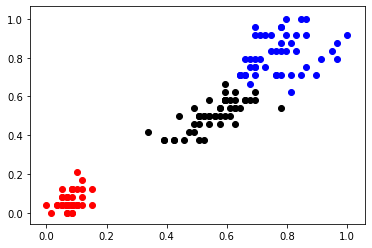

In [45]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')

Elbow:

In [49]:
sse = []
k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [50]:
sse

[128.26168655306054,
 38.22615884825026,
 1.7018746881920968,
 1.2555382834168465,
 0.8538617353912239,
 0.6801035704886196,
 0.5663174952054538,
 0.48648242367753186,
 0.4156536127160733,
 0.36369088943151706]

Text(0, 0.5, 'SSE')

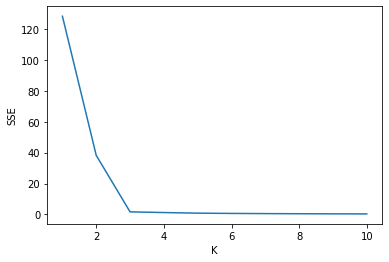

In [52]:
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('SSE')

K = 3 forms the elbow. So this is the best fit.